# Лабораторная работа №5

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка датасета
data = pd.read_csv('datasets/Raisin/Raisin_Dataset.data', delimiter=';')

# Переименуем столбцы для удобства
data.columns = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                'Extent', 'Perimeter', 'Class']

data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
1,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
2,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
3,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
4,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,Kecimen


In [3]:
# Преобразование целевой переменной (Class) в числовой формат
data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})

# Разделение данных на входные признаки (X) и целевую переменную (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Построение модели логистической регрессии
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [6]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


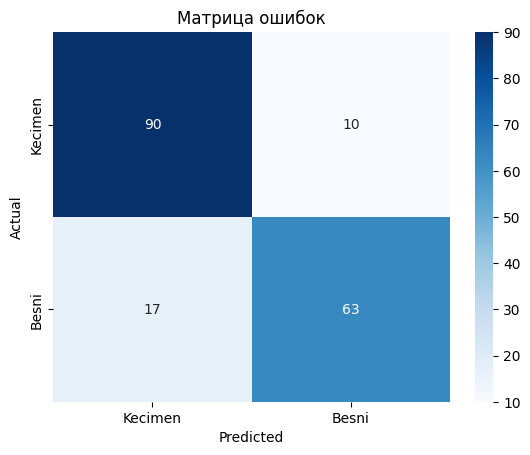

In [7]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Kecimen', 'Besni'], yticklabels=['Kecimen', 'Besni'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Матрица ошибок')
plt.show()

In [8]:
# Отчет по классификации
print(classification_report(y_test, y_pred, target_names=['Kecimen', 'Besni']))

              precision    recall  f1-score   support

     Kecimen       0.84      0.90      0.87       100
       Besni       0.86      0.79      0.82        80

    accuracy                           0.85       180
   macro avg       0.85      0.84      0.85       180
weighted avg       0.85      0.85      0.85       180



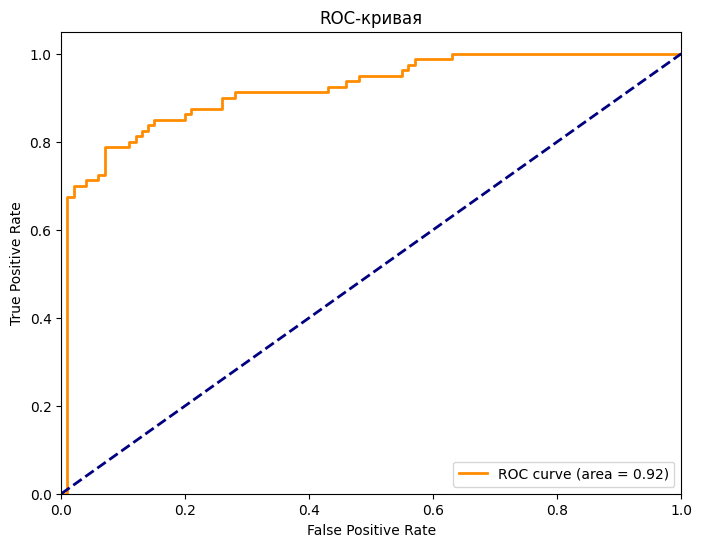

In [9]:
# ROC-кривая и AUC
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # вероятность для класса 'Besni'
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

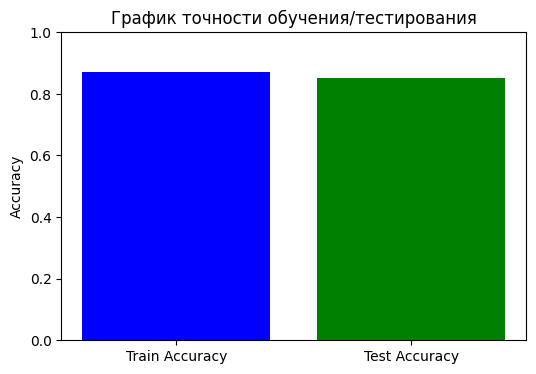

In [10]:
# Линия точности на обучающей и тестовой выборках
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylim(0, 1)
plt.title('График точности обучения/тестирования')
plt.ylabel('Accuracy')
plt.show()

In [11]:
# Сохранение модели
import pickle
with open('raisin_classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)